<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.

## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

Try a variety of response variables. Start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# A:

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [19]:
# A:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Take a look at the data again
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

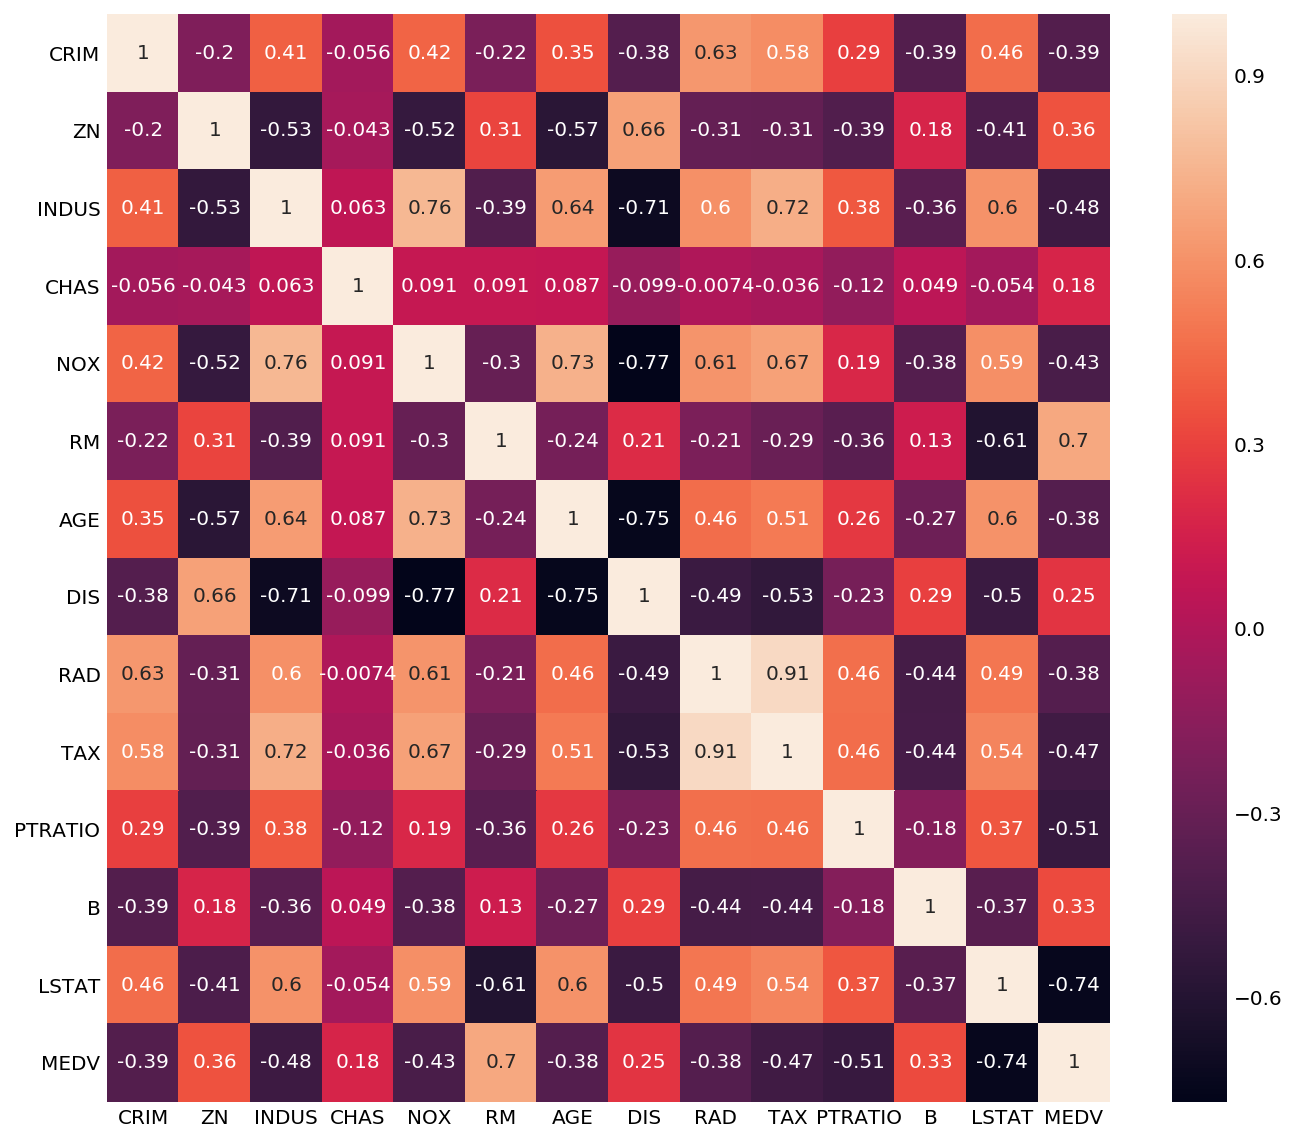

In [24]:
# A:
df_with_target = df.copy()
df_with_target['MEDV'] = y

plt.figure(figsize=(10,10))
sns.heatmap(df_with_target.corr(), annot=True);

In [27]:
# For target MEDV, I will use variables with highest abs(correlation): RM, PTRATIO, LSTAT:

# Train-test-split process fully laid out here, with all loads:
from sklearn.model_selection import train_test_split
X = df_with_target[['RM','PTRATIO','LSTAT']]
y = df_with_target[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(253, 3) (253, 1)
(253, 3) (253, 1)


In [28]:
# Create the model on the test data:

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# What is the correlation of the training data vs testing data:
print(slr.score(X_train, y_train))
print(slr.score(X_test, y_test))
# good stability...

0.6721519850451099
0.6778157191419663


In [31]:
X_train.describe()

,RM,PTRATIO,LSTAT
count,253.000000,253.000000,253.000000
mean,6.222281,18.420553,13.324585
std,0.689492,2.176382,7.486917
min,3.863000,12.600000,2.940000
25%,5.841000,17.000000,7.510000
50%,6.167000,18.700000,12.330000
75%,6.563000,20.200000,17.150000
max,8.398000,22.000000,37.970000


In [32]:
X_test.describe()

# good stability between the training and test data:

,RM,PTRATIO,LSTAT
count,253.000000,253.000000,253.000000
mean,6.346988,18.490514,11.981542
std,0.711403,2.157193,6.725511
min,3.561000,12.600000,1.730000
25%,5.935000,17.400000,6.680000
50%,6.251000,19.100000,10.400000
75%,6.631000,20.200000,16.440000
max,8.780000,22.000000,34.370000


### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [83]:
# A:
# Re-split:
X_train70, X_test70, y_train70, y_test70 = train_test_split(X, y, test_size=0.3, random_state=1)
# Re-run model:
slr70 = LinearRegression()
slr70.fit(X_train70, y_train70)

# What is the correlation of the training data:
print(slr70.score(X_train70, y_train70))
print(slr70.score(X_test70, y_test70))

0.6507406702994561
0.7228623473287098


In [82]:
# A:
# Re-split:
X_train90, X_test90, y_train90, y_test90 = train_test_split(X, y, test_size=0.1, random_state=1)
# Re-run model:
slr90 = LinearRegression()
slr90.fit(X_train90, y_train90)

# What is the correlation of the training data:
print(slr90.score(X_train90, y_train90))
print(slr90.score(X_test90, y_test90))

0.669475143384916
0.7483614949564783


### 4. Try K-Fold cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [84]:
# A:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform 5-fold cross validation
scores5 = cross_val_score(slr, X, y, cv=KFold(n_splits=5))
scores6 = cross_val_score(slr, X, y, cv=KFold(n_splits=6))
scores7 = cross_val_score(slr, X, y, cv=KFold(n_splits=7))
scores8 = cross_val_score(slr, X, y, cv=KFold(n_splits=8))
scores9 = cross_val_score(slr, X, y, cv=KFold(n_splits=9))
scores10 = cross_val_score(slr, X, y, cv=KFold(n_splits=10))

print("Cross-validated scores 5:", scores5.std())
print("Mean cross-validated scores 5:", scores5.mean())

print("Cross-validated scores 6:", scores6.std())
print("Mean cross-validated scores 5:", scores6.mean())

print("Cross-validated scores 7:", scores7.std())
print("Mean cross-validated scores 5:", scores7.mean())

print("Cross-validated scores 8:", scores8.std())
print("Mean cross-validated scores 5:", scores8.mean())

print("Cross-validated scores 9:", scores9.std())
print("Mean cross-validated scores 5:", scores9.mean())

print("Cross-validated scores 10:", scores10.std())
print("Mean cross-validated scores 5:", scores10.mean())

# Higher k appears to be better both giving lower std of scores, and a higher mean.

Cross-validated scores 5: 0.2996751263790995
Mean cross-validated scores 5: 0.430002983179557
Cross-validated scores 6: 0.28610511912849473
Mean cross-validated scores 5: 0.47192727979453797
Cross-validated scores 7: 0.2815253624795938
Mean cross-validated scores 5: 0.4354041099486393
Cross-validated scores 8: 0.5150369338252319
Mean cross-validated scores 5: 0.3406890399199288
Cross-validated scores 9: 0.5021726897876824
Mean cross-validated scores 5: 0.36923864801176487
Cross-validated scores 10: 0.5940741030246819
Mean cross-validated scores 5: 0.20988372914637177


### 5. [Bonus] Optimize the $R^2$ score

Can you optimize your $R^2$ by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [8]:
# A:

### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [80]:
import patsy

# A:
formula = 'DIST ~ INDUS + NOX + AGE'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

model = sm.OLS(y, X).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'DIST' is not defined
    DIST ~ INDUS + NOX + AGE
    ^^^^